In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image file
image_path = r'D:/_phd/code/textures/textureSSD/findBox/z1Sample.png'

# Load the image
image = Image.open(image_path)

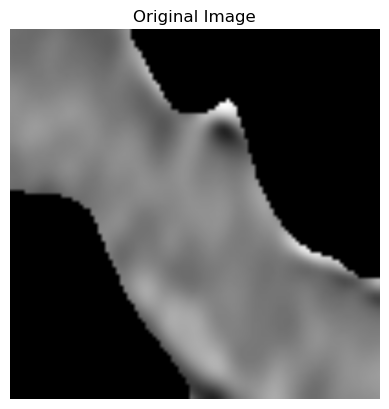

In [4]:
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

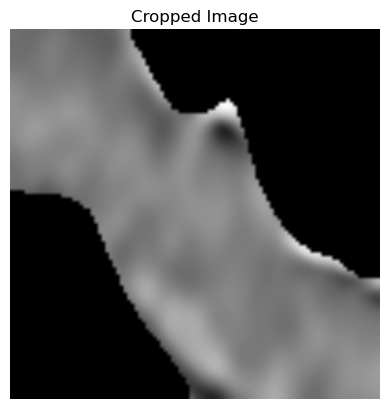

In [5]:
# Find the bounding box of the filled pixels
bbox = image.getbbox()

# Crop the image using the bounding box
cropped_image = image.crop(bbox)

# Display the cropped image
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()

In [9]:
import cv2 as cv
import numpy as np
import largestinteriorrectangle as lir
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
image_path = r'D:/_phd/code/textures/textureSSD/findBox/z1_mask.png'
img = cv.imread(image_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)


In [14]:
contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
contour = np.array([contours[0][:, 0, :]])
inner_bb = lir.lir(contour)

cropped_img = img[inner_bb[1]:inner_bb[1] + inner_bb[3],
                  inner_bb[0]:inner_bb[0] + inner_bb[2]]

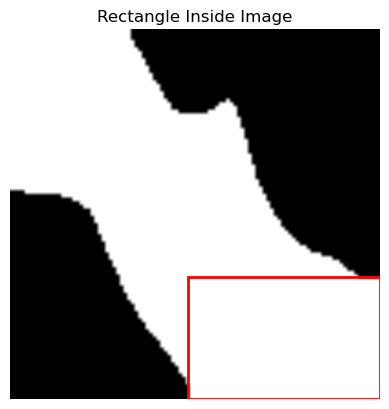

In [15]:
fig, ax = plt.subplots()
ax.imshow(img)
rect = patches.Rectangle((inner_bb[0], inner_bb[1]), inner_bb[2], inner_bb[3], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.set_title('Rectangle Inside Image')
ax.axis('off')
plt.show()